In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.DataFrame({
    "Vibração":[3.2, 4.0, 3.7, 5.5, 6.2, 2.1, 2.8, 1.9, 7.3, 6.8, 2.4, 5.9, 4.5, 
                2.6, 4.8, 3.4, 6.1, 2.0, 5.0, 7.0],
    "Corrente":[12.5, 14.2, 11.8, 15.6, 17.0, 10.2, 9.5, 8.8, 18.4, 17.8, 10.8, 16.2, 
                13.4, 9.9, 13.9, 11.5, 16.7, 8.6, 14.8, 18.0],
    "Temperatura":[50.0, 51.2, 48.5, 53.1, 56.8, 45.7, 43.2, 41.6, 59.3, 57.9, 46.9, 54.7, 49.7, 44.5, 
                   50.8, 47.3, 55.4, 41.0, 52.3, 58.7],
    "Classe":['Não Defeituosa', 'Não Defeituosa', 'Não Defeituosa', 'Não Defeituosa', 'Não Defeituosa',
               'Defeituosa', 'Defeituosa', 'Defeituosa', 'Não Defeituosa', 'Não Defeituosa',
               'Defeituosa', 'Não Defeituosa', 'Não Defeituosa', 'Defeituosa', 'Não Defeituosa', 'Não Defeituosa',
               'Não Defeituosa', 'Defeituosa', 'Não Defeituosa', 'Não Defeituosa']
})

In [22]:
# Separando as caracteristicas e o rótulo
x = data[['Vibração', 'Corrente', 'Temperatura']]

y = data['Classe']

Separando os dados em teste e treino

In [23]:
# Dividindo o conjunto de dados em treinamento (70%) e teste (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=42)

Treinando o modelo SVM

In [24]:
model = SVC(kernel='linear') # Crio o modelo SVC
model.fit(x_train, y_train) # Treino o modelo

SVC(kernel='linear')

Fazendo predições

In [25]:
y_pred = model.predict(x_test)

In [26]:
x_test

,Vibração,Corrente,Temperatura
0,3.2,12.5,50.0
17,2.0,8.6,41.0
15,3.4,11.5,47.3
1,4.0,14.2,51.2
8,7.3,18.4,59.3
5,2.1,10.2,45.7


In [27]:
data.head(18)

,Vibração,Corrente,Temperatura,Classe
0,3.2,12.5,50.0,Não Defeituosa
1,4.0,14.2,51.2,Não Defeituosa
2,3.7,11.8,48.5,Não Defeituosa
3,5.5,15.6,53.1,Não Defeituosa
4,6.2,17.0,56.8,Não Defeituosa
5,2.1,10.2,45.7,Defeituosa
6,2.8,9.5,43.2,Defeituosa
7,1.9,8.8,41.6,Defeituosa
8,7.3,18.4,59.3,Não Defeituosa
9,6.8,17.8,57.9,Não Defeituosa


Avaliando as métricas do algoritmo de Machine Learning

In [34]:
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

1.0


In [33]:
# Classification_repot exibe um resumo das métricas
classi_re = classification_report(y_pred, y_test)
print(classi_re)

                precision    recall  f1-score   support

    Defeituosa       1.00      1.00      1.00         2
Não Defeituosa       1.00      1.00      1.00         4

      accuracy                           1.00         6
     macro avg       1.00      1.00      1.00         6
  weighted avg       1.00      1.00      1.00         6



In [30]:
cm = confusion_matrix(y_pred,y_test)

Text(0.5, 1.0, 'Matriz de confusão para o algoritmo SVM')

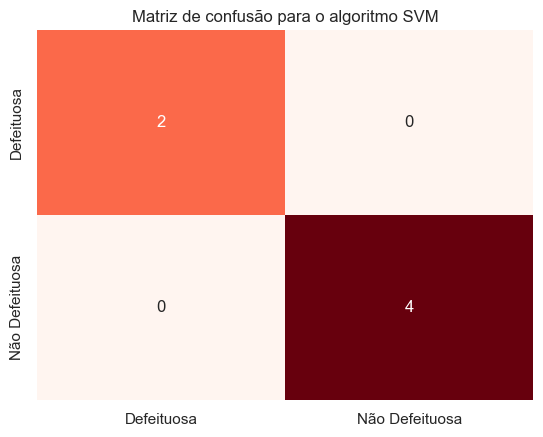

In [31]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Defeituosa', 'Não Defeituosa'],
            yticklabels=['Defeituosa', 'Não Defeituosa'])
plt.title('Matriz de confusão para o algoritmo SVM')

Visualização dos dados da máquina de forma gráfica

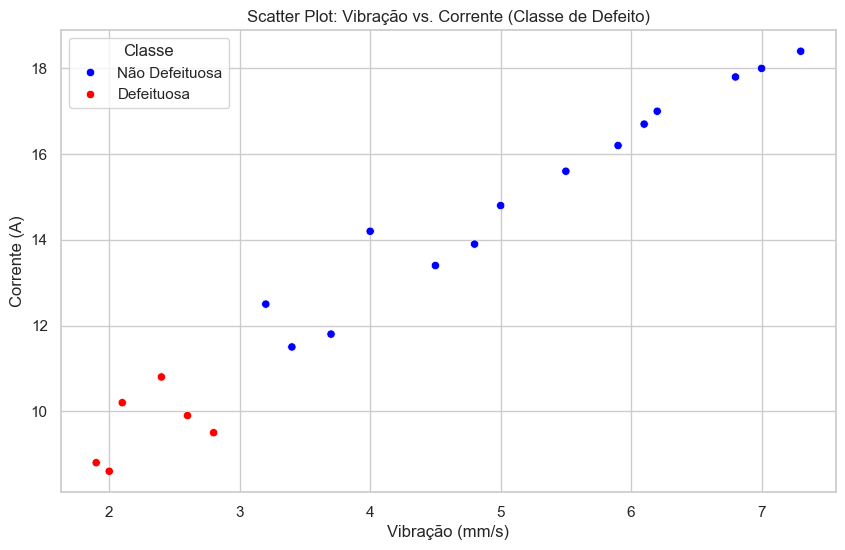

In [32]:
sns.set(style="whitegrid")
# Mapeando as cores com base na classe
palette = {"Defeituosa": "red", "Não Defeituosa": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vibração', y='Corrente', hue='Classe', data=data, palette= palette)

# Personalizando o gráfico
plt.title('Scatter Plot: Vibração vs. Corrente (Classe de Defeito)')
plt.xlabel('Vibração (mm/s)')
plt.ylabel('Corrente (A)')

# Mostrando o gráfico
plt.legend(title='Classe')
plt.show()